In [151]:
import numpy as np
from matplotlib import pyplot as plt
import mplhep as hep
hep.style.use("CMS")

In [152]:
# f = np.load('simclr_predictions.npz')
kyle = np.load('../data/self_supervised_SimCLR_with_MLP.npz', allow_pickle=True)
lana = np.load('../data/vicreg_predictions.npz', allow_pickle=True)
zhengting = np.load('../data/ot.npy', allow_pickle=True)

In [153]:
#Kyle
dims = [2, 4, 8, 16, 32, 64]
x_val = []
y_val = []
y_err = []
for d in dims:
  x_val.append(d)
  if d in kyle['accuracies'][:,1].flatten():
    d_idx = np.where(kyle['accuracies']==d)[0][0]
    y_val.append(kyle['accuracies'][d_idx, 2])
    y_err.append(kyle['accuracies'][d_idx, 3])
  else:
    y_val.append(0)
    y_err.append(0)

In [154]:
#Lana
dims2 = [2, 4, 8, 16, 24, 32]
x_val2 = []
y_val2 = []
y_err2 = []
for d in dims2:
  x_val2.append(d)
  y_val2.append(lana[f'dim{d}_accuracy'].item()*100)
  y_err2.append(np.sqrt(lana[f'dim{d}_accuracy']).item())

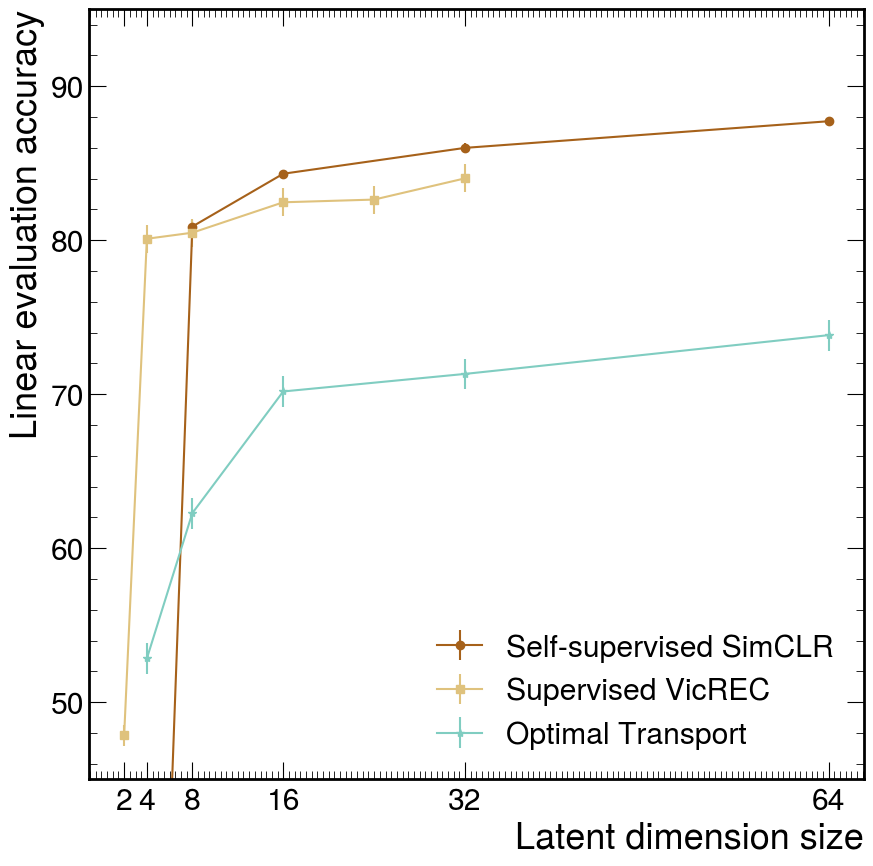

In [155]:
colors = ['#a6611a','#dfc27d','#80cdc1','#018571']
plt.errorbar(x_val, y_val, y_err, c=colors[0],marker='o', label='Self-supervised SimCLR')
plt.errorbar(x_val2, y_val2, y_err2, c=colors[1],marker='s', label='Supervised VicREC')
plt.errorbar([4,8,16,32,64], zhengting, [1,1,1,1,1], c=colors[2],marker='*', label='Optimal Transport')
plt.ylim(45, 95)
plt.xlabel('Latent dimension size')
plt.ylabel('Linear evaluation accuracy')
plt.xticks(x_val)
plt.legend()